# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [4]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [6]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

### Encoding the Independent Variable

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [8]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [0]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [0]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [0]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [0]:
print(y_test)

[0 1]


## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [0]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [0]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]


# PCA

In [20]:
from sklearn.decomposition import PCA
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data[:, :]  # we only take the first two features.
y = iris.target

In [21]:
X.shape

(150, 4)

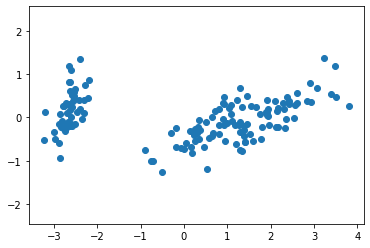

In [26]:
pca = PCA(3)
X_pca = pca.fit_transform(X)

xs = X_pca[:,0]
ys = X_pca[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

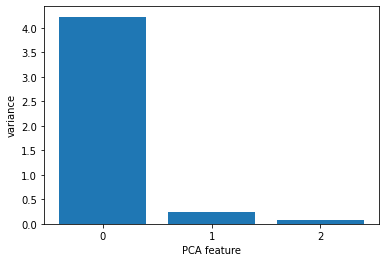

In [27]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

# t-NSE

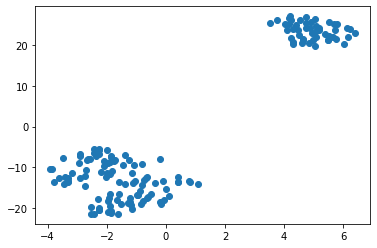

In [31]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys)
plt.show()


# NMF: Non-Negative matrix Factorization
It is interpretable
But it requires only on negative data (for example colors)

In [32]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components = 3)

# Fit the model to articles
model.fit(X)

# Transform the articles: nmf_features
nmf_features = model.transform(X)

# Print the NMF features
print(nmf_features.round(2))


[[0.21 1.1  0.01]
 [0.25 0.94 0.  ]
 [0.2  1.   0.01]
 [0.22 0.93 0.02]
 [0.18 1.12 0.02]
 [0.22 1.17 0.04]
 [0.17 1.03 0.03]
 [0.22 1.04 0.01]
 [0.22 0.87 0.01]
 [0.26 0.95 0.  ]
 [0.22 1.16 0.01]
 [0.22 1.01 0.03]
 [0.24 0.93 0.  ]
 [0.16 0.95 0.  ]
 [0.18 1.33 0.  ]
 [0.15 1.38 0.04]
 [0.17 1.25 0.02]
 [0.21 1.09 0.02]
 [0.26 1.17 0.02]
 [0.18 1.16 0.03]
 [0.29 1.03 0.  ]
 [0.19 1.13 0.04]
 [0.09 1.17 0.02]
 [0.26 0.98 0.03]
 [0.25 0.95 0.04]
 [0.29 0.91 0.  ]
 [0.23 1.02 0.03]
 [0.23 1.08 0.01]
 [0.23 1.07 0.  ]
 [0.23 0.94 0.02]
 [0.26 0.92 0.01]
 [0.26 1.06 0.01]
 [0.15 1.26 0.03]
 [0.15 1.33 0.03]
 [0.26 0.95 0.  ]
 [0.21 1.04 0.  ]
 [0.23 1.14 0.  ]
 [0.18 1.11 0.02]
 [0.19 0.92 0.01]
 [0.24 1.05 0.01]
 [0.18 1.11 0.02]
 [0.28 0.73 0.  ]
 [0.17 0.98 0.02]
 [0.21 1.05 0.05]
 [0.22 1.09 0.06]
 [0.24 0.93 0.01]
 [0.19 1.15 0.03]
 [0.2  0.98 0.02]
 [0.21 1.15 0.01]
 [0.23 1.03 0.  ]
 [0.82 0.5  0.12]
 [0.73 0.5  0.14]
 [0.84 0.43 0.13]
 [0.7  0.27 0.11]
 [0.8  0.37 0.12]
 [0.72 0.3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
